FUZZY LOGIC CRISP RELATION (MAX-MIN COMPOSITION)

In [7]:
import numpy as np


def R(x, y):
    if x == 2 and y == 3:
        return 0.7
    elif x == 2 and y == 4:
        return 0.5
    return 0

def S(y, z):
    if y == 3 and z == 5:
        return 0.8
    elif y == 4 and z == 6:
        return 0.6
    return 0

def max_min_composition(x, z):
    intermediate_results = []


    for y in [3, 4]:

        result = min(R(x, y), S(y, z))
        intermediate_results.append(result)


    return max(intermediate_results)


x_input = 2
output_z = [5, 6]


for z in output_z:
    result = max_min_composition(x_input, z)
    print(f"Degree of membership for input {x_input} and output {z}: {result}")


Degree of membership for input 2 and output 5: 0.7
Degree of membership for input 2 and output 6: 0.5


In [8]:
import numpy as np


def R(x, y):
    """
    Relation R(x, y): Given input x and intermediate y, return the membership value.
    """
    if x == 2 and y == 3:
        return 0.7
    elif x == 2 and y == 4:
        return 0.5
    return 0

def S(y, z):
    """
    Relation S(y, z): Given intermediate y and output z, return the membership value.
    """
    if y == 3 and z == 5:
        return 0.8
    elif y == 4 and z == 6:
        return 0.6
    return 0

def max_min_composition(x, z):
    """
    Computes the Max-Min Composition for input x and output z.
    """
    intermediate_results = []

    print(f"\n--- Max-Min Composition for x = {x} and z = {z} ---")


    for y in [3, 4]:

        R_xy = R(x, y)
        S_yz = S(y, z)


        min_result = min(R_xy, S_yz)
        intermediate_results.append(min_result)


        print(f"\nFor intermediate y = {y}:")
        print(f"  R({x}, {y}) = {R_xy}")
        print(f"  S({y}, {z}) = {S_yz}")
        print(f"  min(R({x}, {y}), S({y}, {z})) = min({R_xy}, {S_yz}) = {min_result}")


    max_result = max(intermediate_results)

    print(f"\nFinally, the Max of all intermediate min results is:")
    print(f"  max({intermediate_results}) = {max_result}")

    return max_result


x_input = 2
output_z = [5, 6]


for z in output_z:
    result = max_min_composition(x_input, z)
    print(f"\nDegree of membership for input {x_input} and output {z} is: {result}")


--- Max-Min Composition for x = 2 and z = 5 ---

For intermediate y = 3:
  R(2, 3) = 0.7
  S(3, 5) = 0.8
  min(R(2, 3), S(3, 5)) = min(0.7, 0.8) = 0.7

For intermediate y = 4:
  R(2, 4) = 0.5
  S(4, 5) = 0
  min(R(2, 4), S(4, 5)) = min(0.5, 0) = 0

Finally, the Max of all intermediate min results is:
  max([0.7, 0]) = 0.7

Degree of membership for input 2 and output 5 is: 0.7

--- Max-Min Composition for x = 2 and z = 6 ---

For intermediate y = 3:
  R(2, 3) = 0.7
  S(3, 6) = 0
  min(R(2, 3), S(3, 6)) = min(0.7, 0) = 0

For intermediate y = 4:
  R(2, 4) = 0.5
  S(4, 6) = 0.6
  min(R(2, 4), S(4, 6)) = min(0.5, 0.6) = 0.5

Finally, the Max of all intermediate min results is:
  max([0, 0.5]) = 0.5

Degree of membership for input 2 and output 6 is: 0.5


In [9]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.9 MB/s eta 0:00:00


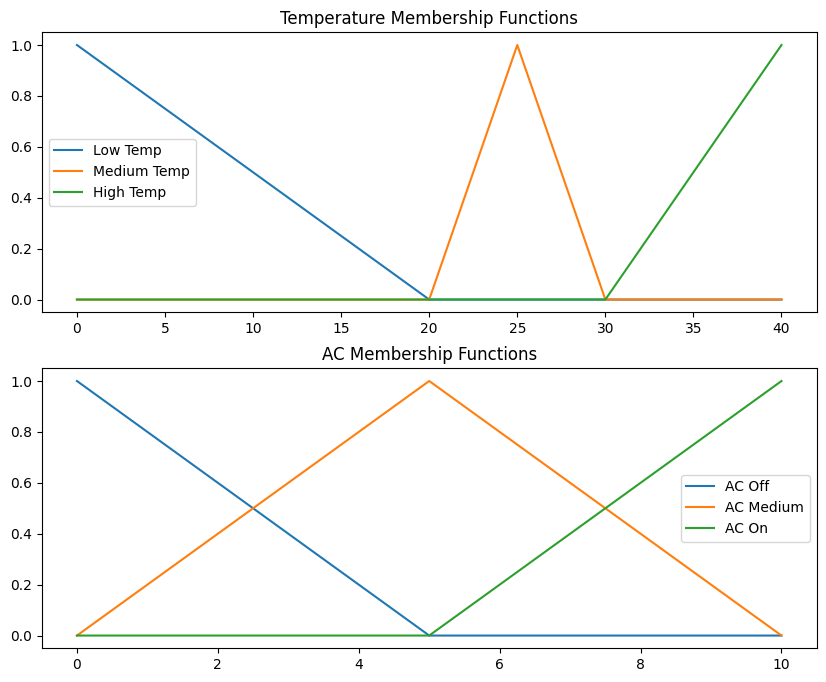

Temperature Input: 28°C
Recommended AC Level: 5.0


In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


temperature = np.arange(0, 41, 1)
ac_level = np.arange(0, 11, 1)


temp_low = fuzz.trimf(temperature, [0, 0, 20])
temp_medium = fuzz.trimf(temperature, [20, 25, 30])
temp_high = fuzz.trimf(temperature, [30, 40, 40])


ac_off = fuzz.trimf(ac_level, [0, 0, 5])
ac_medium = fuzz.trimf(ac_level, [0, 5, 10])
ac_on = fuzz.trimf(ac_level, [5, 10, 10])


plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(temperature, temp_low, label="Low Temp")
plt.plot(temperature, temp_medium, label="Medium Temp")
plt.plot(temperature, temp_high, label="High Temp")
plt.title('Temperature Membership Functions')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ac_level, ac_off, label="AC Off")
plt.plot(ac_level, ac_medium, label="AC Medium")
plt.plot(ac_level, ac_on, label="AC On")
plt.title('AC Membership Functions')
plt.legend()

plt.show()


temp_input = 28
temp_low_level = fuzz.interp_membership(temperature, temp_low, temp_input)
temp_medium_level = fuzz.interp_membership(temperature, temp_medium, temp_input)
temp_high_level = fuzz.interp_membership(temperature, temp_high, temp_input)


ac_off_level = np.fmax(temp_low_level, ac_off)
ac_medium_level = np.fmax(temp_medium_level, ac_medium)
ac_on_level = np.fmax(temp_high_level, ac_on)


ac_combined = np.fmax(ac_off_level, np.fmax(ac_medium_level, ac_on_level))


ac_output = fuzz.defuzz(ac_level, ac_combined, 'centroid')

print(f"Temperature Input: {temp_input}°C")
print(f"Recommended AC Level: {ac_output}")